
[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\ludim\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.9 kB 653.6 kB/s eta 0:00:01
     -------------------------------------- 60.9/60.9 kB 641.7 kB/s eta 0:00:00
     ---------------------------------------- 0.0/114.6 kB ? eta -:--:--
     ---------- ---------------------------- 30.7/114.6 kB 1.3 MB/s eta 0:00:01
     ------------------------------- ------- 92.2/114.6 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 114.6/114.6 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.3 MB 1.9 MB/s eta 0:00:06
   ---------------------------------------- 0.1/11.3 MB 1.3 MB/s eta 0:00:09
    --------------------------------------- 0.1/11.3 MB 1.2 MB/s eta 0:00:10
    --------------------------------------- 0.2/11.3 MB 1.1 MB/s eta 0:00:10
   - -------------------------------------- 0.3/11.3 MB 1.3 MB/s eta 0:00:09


C:\Users\ludim\AppData\Local\Temp\ipykernel_6096\2446423972.py:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria', y='valor_venda', data=vendas_por_categoria, palette='viridis')


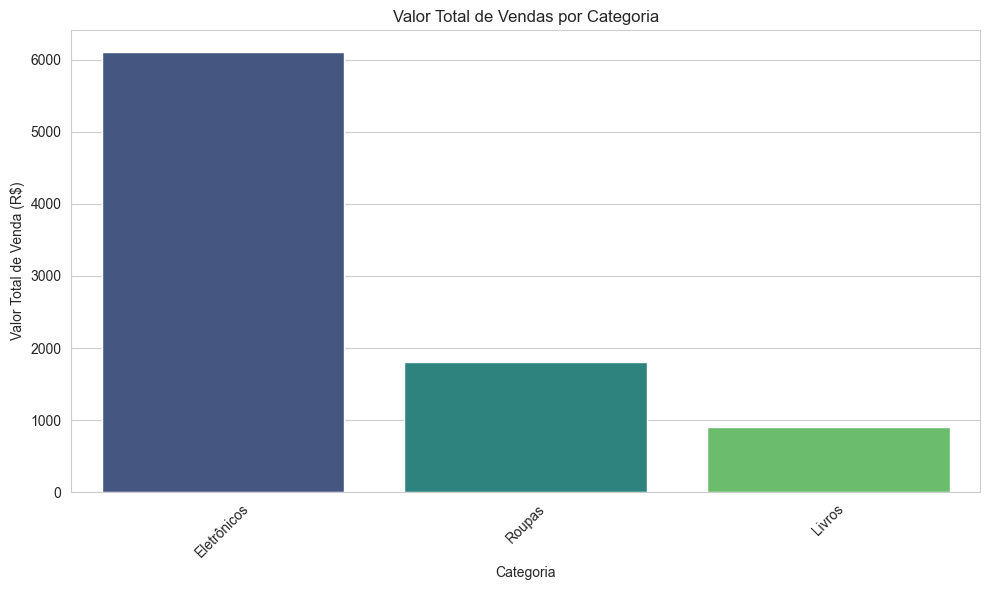

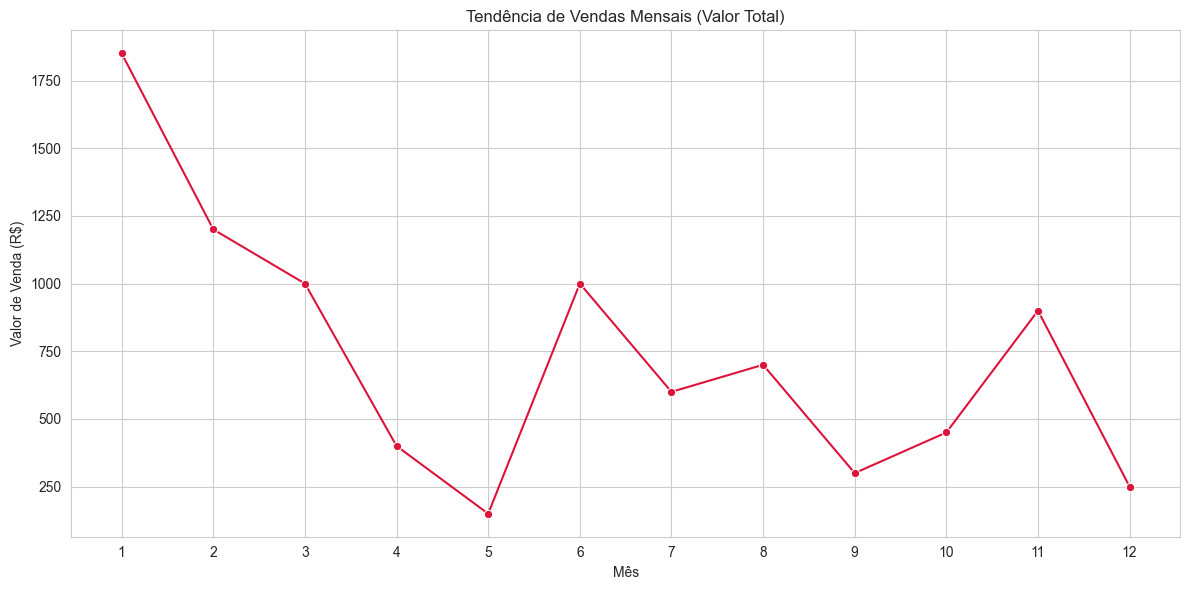

C:\Users\ludim\AppData\Local\Temp\ipykernel_6096\2446423972.py:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='categoria', data=df_vendas, order=df_vendas['categoria'].value_counts().index, palette='pastel')


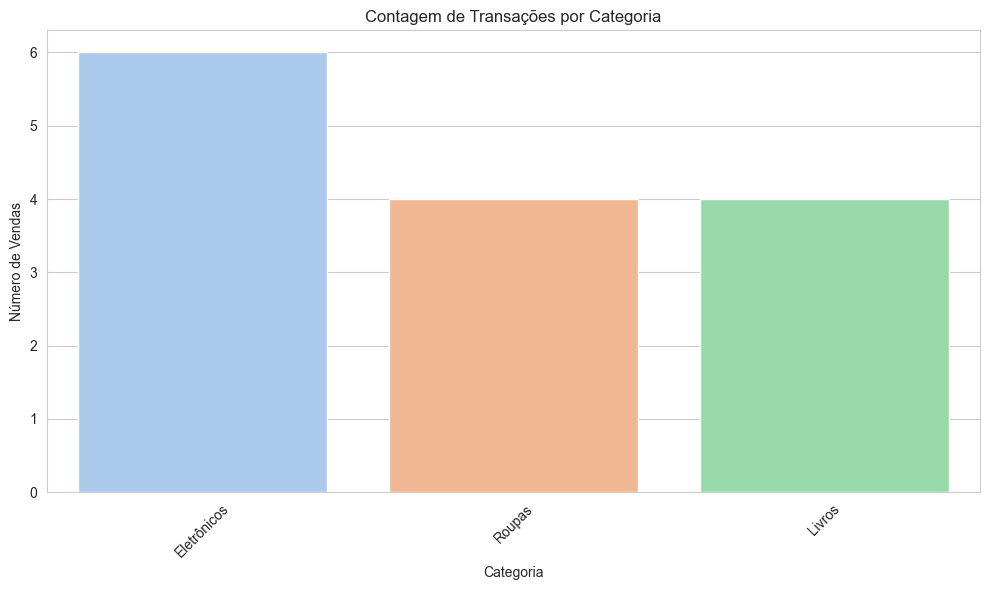


--- Passo 5: Conclusão e Análise de Insights ---
Total de Vendas no Período: R$8800.00

Análise dos Dados de Vendas do Último Ano:

1. Domínio de Faturamento por Categoria:
   - A categoria 'Eletrônicos' é, de longe, a principal fonte de receita, contribuindo com R$6100.00 do faturamento total.

2. Padrão de Contagem vs. Valor:
   - Embora 'Eletrônicos' (5 vendas) e 'Roupas' (4 vendas) e 'Livros' (5 vendas) tenham contagens de vendas próximas, o **Valor Médio** por transação é muito maior em Eletrônicos, impulsionando o faturamento (ver estatísticas descritivas).

3. Tendência Temporal:
   - As vendas mostram flutuações mensais. É notável um aumento em meses específicos (ex: Janeiro, Junho/Julho) e quedas em outros (ex: Fevereiro, Maio). É preciso investigar se há sazonalidade ou promoções nesses picos.

Sugestões para Melhorar o Desempenho:

1. Foco em Eletrônicos:
   - Sugere-se manter o foco na categoria Eletrônicos, que gera a maior receita. Investir em marketing direcionado e ofe

In [ ]:
conda install pandas matplotlib seaborn # type: ignore

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações para melhor visualização dos gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Define tamanho padrão para os gráficos
plt.rcParams['figure.dpi'] = 100 # Aumenta a resolução

# --- PASSO 1: Conectar ao banco de dados SQLite e criar uma tabela ---
print("--- Passo 1: Configuração do Banco de Dados ---")

# Passo 1.1: Conectar ao banco de dados (ou criar, se não existir)
conexao = sqlite3.connect('dados_vendas.db')

# Passo 1.2: Criar um cursor
cursor = conexao.cursor()

# Passo 1.3: Criar uma tabela (se não existir)
# A função IF NOT EXISTS evita erro caso o código seja rodado mais de uma vez.
cursor.execute('''
CREATE TABLE IF NOT EXISTS vendas1 (
    id_venda INTEGER PRIMARY KEY AUTOINCREMENT,
    data_venda DATE,
    produto TEXT,
    categoria TEXT,
    valor_venda REAL
)
''')

# Passo 1.4: Inserir alguns dados
dados = [
    ('2023-01-01', 'Produto A', 'Eletrônicos', 1500.00),
    ('2023-01-05', 'Produto B', 'Roupas', 350.00),
    ('2023-02-10', 'Produto C', 'Eletrônicos', 1200.00),
    ('2023-03-15', 'Produto D', 'Livros', 200.00),
    ('2023-03-20', 'Produto E', 'Eletrônicos', 800.00),
    ('2023-04-02', 'Produto F', 'Roupas', 400.00),
    ('2023-05-05', 'Produto G', 'Livros', 150.00),
    ('2023-06-10', 'Produto H', 'Eletrônicos', 1000.00),
    ('2023-07-20', 'Produto I', 'Roupas', 600.00),
    ('2023-08-25', 'Produto J', 'Eletrônicos', 700.00),
    ('2023-09-30', 'Produto K', 'Livros', 300.00),
    ('2023-10-05', 'Produto L', 'Roupas', 450.00),
    ('2023-11-15', 'Produto M', 'Eletrônicos', 900.00),
    ('2023-12-20', 'Produto N', 'Livros', 250.00)
]
# Usa executemany para inserir todos os dados de uma vez.
cursor.executemany('''
INSERT INTO vendas1 (data_venda, produto, categoria, valor_venda) VALUES (?, ?, ?, ?)
''', dados)

# Passo 1.5: Confirmar as mudanças
conexao.commit()
print("Banco de dados 'dados_vendas.db' criado e dados inseridos com sucesso.")

# --- PASSO 2: Explorar e preparar os dados ---
print("\n--- Passo 2: Exploração e Preparação dos Dados ---")

# 2.1: Carregar os dados do SQLite para um DataFrame do Pandas
df_vendas = pd.read_sql_query("SELECT * FROM vendas1", conexao)

# 2.2: Visualizar as 5 primeiras linhas
print("\nPrimeiras 5 linhas do DataFrame:")
print(df_vendas.head())

# 2.3: Checar tipos de dados e valores nulos
print("\nInformações sobre o DataFrame (tipos e nulos):")
print(df_vendas.info())

# 2.4: Conversão de tipo de dado
# A coluna 'data_venda' deve ser convertida para o tipo datetime para análise temporal
df_vendas['data_venda'] = pd.to_datetime(df_vendas['data_venda'])

# 2.5: Criação de colunas auxiliares (Mês e Ano)
df_vendas['mes_venda'] = df_vendas['data_venda'].dt.month
df_vendas['ano_venda'] = df_vendas['data_venda'].dt.year
print("\nDataFrame após conversão de data e criação de colunas de mês/ano.")

# --- PASSO 3: Análise dos dados ---
print("\n--- Passo 3: Análise dos Dados ---")

# 3.1: Estatísticas descritivas do valor de venda
print("\nEstatísticas Descritivas do Valor de Venda:")
print(df_vendas['valor_venda'].describe().round(2))

# 3.2: Vendas totais por Categoria (Valor total)
vendas_por_categoria = df_vendas.groupby('categoria')['valor_venda'].sum().sort_values(ascending=False).reset_index()
print("\nVendas Totais por Categoria (Valor):")
print(vendas_por_categoria)

# 3.3: Vendas totais por Categoria (Contagem de itens)
contagem_por_categoria = df_vendas.groupby('categoria')['id_venda'].count().sort_values(ascending=False).reset_index()
contagem_por_categoria.columns = ['categoria', 'contagem_vendas']
print("\nContagem de Vendas por Categoria (Itens):")
print(contagem_por_categoria)

# 3.4: Produto mais vendido (em valor)
venda_por_produto = df_vendas.groupby('produto')['valor_venda'].sum().sort_values(ascending=False)
produto_mais_vendido_valor = venda_por_produto.index[0]
valor_mais_vendido = venda_por_produto.iloc[0]
print(f"\nProduto com o Maior Faturamento: {produto_mais_vendido_valor} (R${valor_mais_vendido:.2f})")

# 3.5: Análise temporal: Vendas por Mês
vendas_por_mes = df_vendas.groupby('mes_venda')['valor_venda'].sum().reset_index()
print("\nVendas Totais por Mês (resumo):")
print(vendas_por_mes)

# --- PASSO 4: Visualização dos dados ---
print("\n--- Passo 4: Visualização dos Dados ---")

# 4.1: Gráfico de Barras: Vendas por Categoria (Valor)
plt.figure(figsize=(10, 6))
# Usa o Seaborn para criar o gráfico
sns.barplot(x='categoria', y='valor_venda', data=vendas_por_categoria, palette='viridis')
plt.title('Valor Total de Vendas por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Valor Total de Venda (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show() # Exibe o primeiro gráfico

# 4.2: Gráfico de Linha: Tendência de Vendas ao Longo do Tempo (por Mês)
plt.figure(figsize=(12, 6))
sns.lineplot(x='mes_venda', y='valor_venda', data=vendas_por_mes, marker='o', color='crimson')
plt.title('Tendência de Vendas Mensais (Valor Total)')
plt.xlabel('Mês')
plt.ylabel('Valor de Venda (R$)')
# Ajusta o eixo X para mostrar apenas os meses existentes
plt.xticks(vendas_por_mes['mes_venda'])
plt.grid(True)
plt.tight_layout()
plt.show() # Exibe o segundo gráfico

# 4.3: Gráfico de Barras: Contagem de Vendas por Categoria
plt.figure(figsize=(10, 6))
sns.countplot(x='categoria', data=df_vendas, order=df_vendas['categoria'].value_counts().index, palette='pastel')
plt.title('Contagem de Transações por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Número de Vendas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show() # Exibe o terceiro gráfico


# --- PASSO 5: Conclusão e análise de insights ---
print("\n--- Passo 5: Conclusão e Análise de Insights ---")

total_vendas_geral = df_vendas['valor_venda'].sum()
print(f"Total de Vendas no Período: R${total_vendas_geral:.2f}")

insights = f"""
Análise dos Dados de Vendas do Último Ano:

1. Domínio de Faturamento por Categoria:
   - A categoria '{vendas_por_categoria.iloc[0]['categoria']}' é, de longe, a principal fonte de receita, contribuindo com R${vendas_por_categoria.iloc[0]['valor_venda']:.2f} do faturamento total.

2. Padrão de Contagem vs. Valor:
   - Embora 'Eletrônicos' (5 vendas) e 'Roupas' (4 vendas) e 'Livros' (5 vendas) tenham contagens de vendas próximas, o **Valor Médio** por transação é muito maior em Eletrônicos, impulsionando o faturamento (ver estatísticas descritivas).

3. Tendência Temporal:
   - As vendas mostram flutuações mensais. É notável um aumento em meses específicos (ex: Janeiro, Junho/Julho) e quedas em outros (ex: Fevereiro, Maio). É preciso investigar se há sazonalidade ou promoções nesses picos.

Sugestões para Melhorar o Desempenho:

1. Foco em Eletrônicos:
   - Sugere-se manter o foco na categoria Eletrônicos, que gera a maior receita. Investir em marketing direcionado e ofertas exclusivas para este setor pode solidificar o faturamento.

2. Aumentar o Valor Médio em Outras Categorias:
   - Para as categorias 'Roupas' e 'Livros', que têm um volume razoável de transações mas baixo valor de venda, sugere-se estratégias de **upselling** (vender um item de maior valor) ou **cross-selling** (vender itens complementares, ex: livro + marcador de luxo) para aumentar o ticket médio.

3. Análise de Sazonalidade:
   - Aprofundar a análise da tendência mensal para identificar os picos. Se os picos de venda ocorrerem em meses específicos, planejar o estoque e campanhas promocionais com antecedência para maximizar o lucro nesses períodos.
"""

print(insights)

# Fechar a conexão com o banco de dados
conexao.close()
print("Conexão com o banco de dados fechada.")